# Analysis of Capomulin versus other treatment regimens
**Author:** Leonard Paul-Kamara

## Analysis Objectives

This project involves analysis of the effect of cancer treatment drugs on the volume size of squamous cell carcinoma (scc). The drugs were administered for 45 days to 249 mice identified with scc. Volume size of the tumors were recorded throughout the 45 days period at different time points.
The main objective is to compare Pymaceutical's drug of interest Capomulin, to other drug regimen involved in the trial.  

Detailed analysis of the data generated from the trial is seen below.

## Observations
Three observations from analysis of the data include:
1. Male mouse population make up about 50.6% while that of the female is 49.4%.
2. A decrease of tumor volume as time point progresses as observed in mouse s185 treated with Capomulin.
3. Positive correlation between average tumor volume and weight as seen in the scatter plot "Relationship between Weight and Average Tumor Volume". 

## Qualitative Analysis

### Import dependencies and setup
All the necessary dependencies for a successful analysis are imported.
Tasks:
* Read Mouse metadata and Study Results to create mouse_data and study_results data frames respectively.
* Combine the data into a single dataset mouse_df.
* Inspect mouse_df.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Inspect and count and data type of mouse_df columns

In [2]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


### Data Cleaning

* Number of mice in study: num_mice 

In [3]:
num_mice = mouse_df['Mouse ID'].nunique()
print(f"There are {num_mice} distinct mice in the trial")

There are 249 distinct mice in the trial


* Check for duplicate mouse: duplicate

In [4]:
duplicate = mouse_df.duplicated().value_counts()
duplicate

False    1892
True        1
dtype: int64

* Extract rows with duplicate mouse information: duplicated

In [5]:
duplicated = mouse_df[mouse_df.duplicated()]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


* Drop duplicate mouse
* Confirm duplicate mouse is dropped: duplicate_dropped

In [6]:
mouse_df = mouse_df.drop_duplicates(keep='first')

duplicate_dropped = mouse_df.duplicated().value_counts()
print(f"There are {duplicate_dropped[0]} non duplicate rows left in the dataframe.")

There are 1892 non duplicate rows left in the dataframe.


### Compute Statistics

Tasks
* Create a groupby object of drug regimen: drug_groupby
* Mean Tumor Volume for each drug regimen: tumor_volume_mean
* Median Tumor Volume for each drug regimen: tumor_volume_median
* Variance of Tumor Volume for each drug regimen: tumor_volume_variance
* Standard Deviation of Tumor Volume for each drug regimen: tumor_volume_std
* SEM of Tumor Volume for each drug regimen: tumor_volume_sem

In [7]:
drug_groupby = mouse_df.groupby('Drug Regimen')

tumor_volume_mean = drug_groupby['Tumor Volume (mm3)'].mean()

tumor_volume_median = drug_groupby['Tumor Volume (mm3)'].median()

tumor_volume_variance = drug_groupby['Tumor Volume (mm3)'].var()

tumor_volume_std = drug_groupby['Tumor Volume (mm3)'].std()

tumor_volume_sem = drug_groupby['Tumor Volume (mm3)'].sem()

* Summary table of statistics: summary_statistics

In [8]:
summary_statistics = pd.DataFrame({'Mean': tumor_volume_mean,
                                  'Median': tumor_volume_median, 
                                  'Variance': tumor_volume_variance, 
                                  'std': tumor_volume_std, 
                                  'sem': tumor_volume_sem})

summary_statistics

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar plot showing count of mice for each treatment regimen

* Calculate Mice count: mouse_count

In [9]:
mouse_count = drug_groupby['Mouse ID'].count()
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

### Create bar Plot with pandas
* Create the plot
* Set a title for the chart and axis label

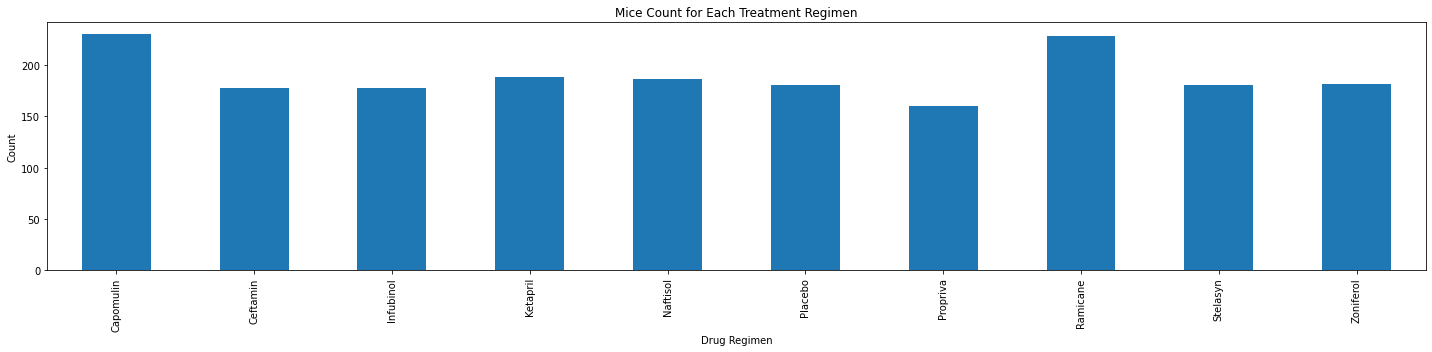

In [10]:
mouse_count.plot(kind='bar', figsize=(20, 5))
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()

### Create bar plot using matplotlib
* Set x axis and tick locations: x_axis, tick_locations
* Set figure size to adjust for space
* Create the plot
* Set x and y limits
* Set a Title and labels
* Show the graph

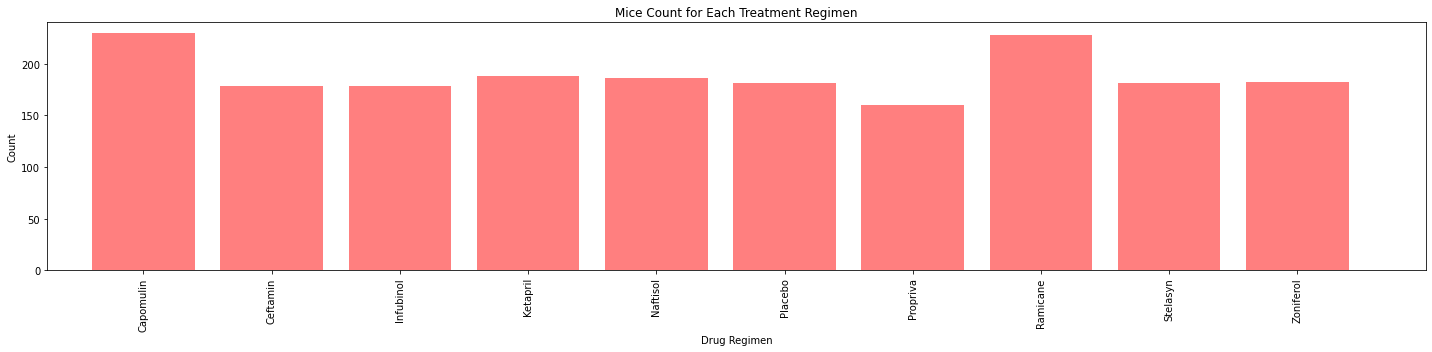

In [11]:
x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]
 
plt.figure(figsize=(20,5))
 
plt.bar(x_axis, mouse_count, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mouse_count.index, rotation="vertical")
 
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count)+10)

plt.title('Mice Count for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
 
plt.tight_layout()
plt.show()


### Pie plot of population gender

### Pie plot using pandas
* Count of Mice Gender: mouse_sex_count
* Create Pie Plot
* Set a title for the chart, label the axes and show the plot

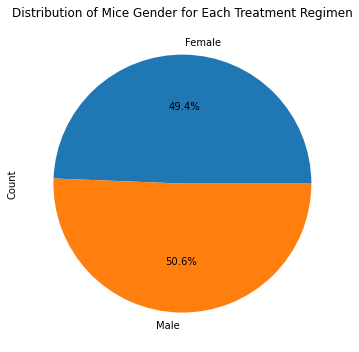

In [12]:
mouse_gender = mouse_df.groupby('Sex')

mouse_sex_count = mouse_gender['Mouse ID'].count()

mouse_sex_count.plot(kind='pie', figsize=(20, 5), autopct='%1.1f%%')

plt.ylabel('Count')
plt.title('Distribution of Mice Gender for Each Treatment Regimen')
plt.tight_layout()
plt.show()

### Pie plot using matplotlib
* Create figure and labels
* Create the plot
* Set title, label axis and show plot

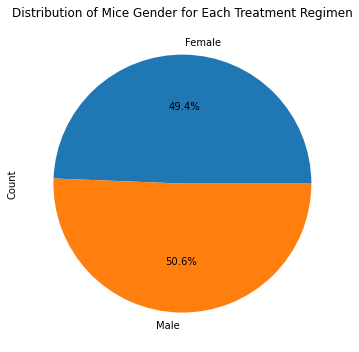

In [13]:
plt.figure(figsize=(20, 5))
labels = ['Female', 'Male']

plt.pie(mouse_sex_count, autopct="%1.1f%%", labels=labels)

plt.ylabel('Count')
plt.title('Distribution of Mice Gender for Each Treatment Regimen')
plt.tight_layout()
plt.show()

### Subset Analysis of the four promising drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)

* Select all rows of the four promising drug regimen: df_four

In [14]:
df_four = mouse_df.loc[(mouse_df['Drug Regimen']=='Capomulin') | (mouse_df['Drug Regimen']=='Ramicane') | (mouse_df['Drug Regimen']=='Infubinol') | (mouse_df['Drug Regimen']=='Ceftamin')]
df_four.head()   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


* Create a groupby object grouping by Mouse ID: mouse_grouped
* Select maximum timepoint for each drug regimen by mouse: max_time_point

In [15]:
mouse_grouped = df_four.groupby('Mouse ID')
 
max_time_point = mouse_grouped['Timepoint'].max()
max_time_point.reset_index().head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


* Merge max_time_point dataframe with original dataframe: final_volume_df                                                

In [16]:
final_volume_df = pd.merge(max_time_point, mouse_df, on=['Mouse ID', 'Timepoint'])
final_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


* Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
* Create a summary table of statistics: summary_table_stats

In [17]:
four_drugs = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']
tumor_volume = []
data = []
for drug in four_drugs:
    tumor_volume.append(final_volume_df.loc[final_volume_df['Drug Regimen']==drug]['Tumor Volume (mm3)'])
    
    lowerq = np.quantile(tumor_volume, 0.25)
    secondq = np.quantile(tumor_volume, 0.5)
    upperq = np.quantile(tumor_volume, 0.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    
        
    data.append((drug, lowerq, secondq, upperq, iqr, lower_bound, upper_bound))
cols = ['Drug Regimen', 'First Quartile', 'Second Quartile', 'Third quartile', 'IQR', 'Lower Bound', 'Upper Bound']
   
summary_table_stats = pd.DataFrame(data, columns=cols)               
summary_table_stats

,Drug Regimen,First Quartile,Second Quartile,Third quartile,IQR,Lower Bound,Upper Bound
0,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
1,Ceftamin,51.888160,60.008568,64.551169,12.663009,32.893646,83.545683
2,Ramicane,39.734686,51.542431,61.983151,22.248465,6.361989,95.355848
3,Capomulin,37.187744,45.000000,59.930262,22.742518,3.073967,94.044039


* Generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

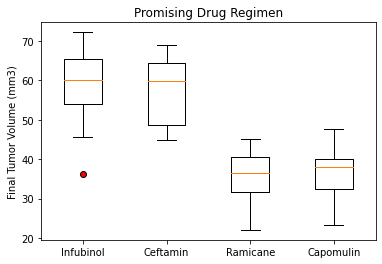

In [18]:
red_circle = dict(markerfacecolor='r', marker='o')    
fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, labels=four_drugs, flierprops=red_circle)
plt.show()

### Time series analysis of tumor volume after treatment with capomulin

* Select all rows of capomulin from the original data frame: mouse_capomulin

In [19]:
mouse_capomulin = mouse_df.loc[mouse_df['Drug Regimen']=='Capomulin']
mouse_capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


* Random selection of female mouse with Mouse ID s185: mouse_s185

In [20]:
mouse_s185 = mouse_df.loc[mouse_df['Mouse ID']=='s185']
mouse_s185.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


* Create line plot of tumor volume vs timepoint

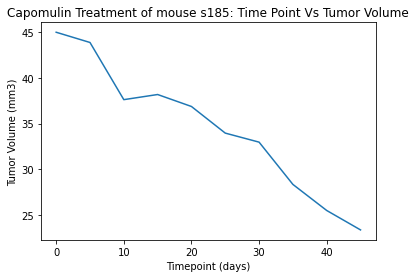

In [21]:
time = mouse_s185['Timepoint']
tumor_vol = mouse_s185['Tumor Volume (mm3)']
plt.plot(time, tumor_vol)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin Treatment of mouse s185: Time Point Vs Tumor Volume')

plt.show()

### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

* Group by Mouse Id: capomulin_grouped
* Calculate mean tumor volume: avg_mean_vol
* Create a dataframe of mean tumor volume: capomulin_grouped_df

In [22]:
capomulin_grouped = mouse_capomulin.groupby('Mouse ID')
avg_mean_vol = capomulin_grouped[['Weight (g)', 'Tumor Volume (mm3)']].mean()
capomulin_grouped_df = pd.DataFrame(avg_mean_vol)
capomulin_grouped_df.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


* Create the scatter plot

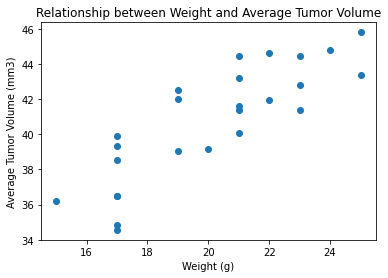

In [23]:
x_values = capomulin_grouped_df['Weight (g)']
y_values = capomulin_grouped_df['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Relationship between Weight and Average Tumor Volume')
plt.show()

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
* Plot the linear regression model on top of the previous scatter plot.

The r-squared is: 0.7088568047708717
The equation of the line is: y = 0.95x + 21.55


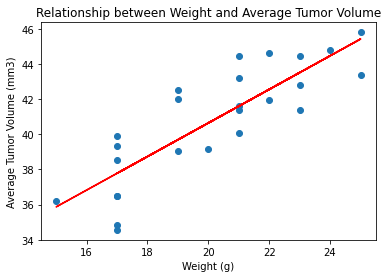

In [24]:
weight = capomulin_grouped_df['Weight (g)']
tumor_volume = capomulin_grouped_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Relationship between Weight and Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")
plt.show()